In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from utils import *

/data4/aamayuelasfernandez/anaconda3/envs/fingpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read data

In [11]:
filename = "results/peft_fingpt-forecaster-crypto-20230125-20240125-1-4-065-modified.csv"
df = pd.read_csv(filename)

In [12]:
df['symbol'].unique()

array(['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'STETH-USD',
       'ADA-USD', 'AVAX-USD', 'DOGE-USD', 'TRX-USD', 'WTRX-USD',
       'DOT-USD', 'LINK-USD', 'MATIC-USD', 'TON11419-USD', 'ICP-USD',
       'LTC-USD', 'BCH-USD', 'LEO-USD', 'ATOM-USD', 'UNI7083-USD',
       'ETC-USD', 'XLM-USD', 'OKB-USD', 'APT21794-USD'], dtype=object)

## Parse and update DF

In [13]:
gt_parsed = [parse_answer(answer, partial=True) for answer in df['answer']]
gt_margins, gt_bins = [], []
for label in df['label']:
    gt_margin, gt_bin = from_bin_to_margin(label)
    gt_margins.append(gt_margin)
    gt_bins.append(gt_bin)
gt_margins = np.array(gt_margins)
gt_bins = np.array(gt_bins)
df['gt_margin'] = gt_margins
df['gt_bin'] = gt_bins

In [14]:
pred_parsed = [parse_answer(answer, partial=True) for answer in df['generated']]
pred_margins = [answer['prediction'] if answer else 0 for answer in pred_parsed]
pred_bins = [answer['prediction_binary'] if answer else 0 for answer in pred_parsed]
pred_margins = np.array(pred_margins)
pred_bins = np.array(pred_bins)
df['pred_margin'] = pred_margins
df['pred_bin'] = pred_bins

## General

In [15]:
calc_metrics(df['generated'], df['answer'], partial=True)

{'valid_count': 447,
 'bin_acc': 0.4519015659955257,
 'mse': 34.34675615212528,
 'rmse': 5.860610561377141,
 'mae': 4.8970917225950785}

In [16]:
correlation_coeff = np.corrcoef(gt_margins, pred_margins)[0, 1]
print(f'Correlation Coefficient: {correlation_coeff}')

mse = np.mean((gt_margins - pred_margins) ** 2)
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

mae = np.mean(np.abs(gt_margins - pred_margins))
print(f'MAE: {mae}')

Correlation Coefficient: -0.09305159993626058
MSE: 34.49777777777778
RMSE: 5.873480891071135
MAE: 4.906666666666666


## Specific symbol

In [17]:
symbol = 'BTC-USD'
df_stock = df[df['symbol'] == symbol]

In [18]:
calc_metrics(df_stock['generated'], df_stock['answer'])

{}

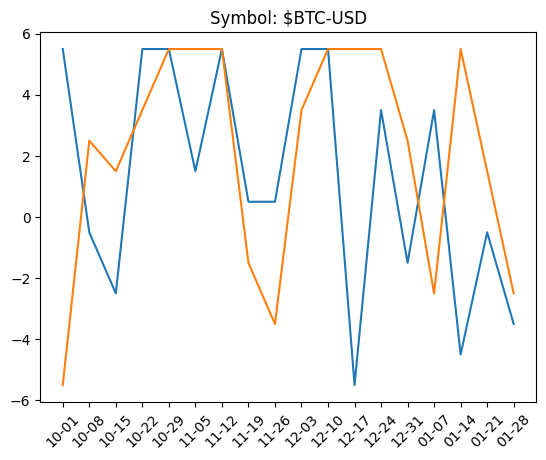

In [19]:
plt.plot(df_stock['period'].apply(lambda x: x[-5:]), df_stock['gt_margin'])
plt.plot(df_stock['period'].apply(lambda x: x[-5:]), df_stock['pred_margin'])
plt.title(f'Symbol: ${symbol}')
plt.xticks(rotation=45)
plt.show()

In [20]:
print(df_stock.iloc[0]['generated'])

[Prediction & Analysis]:
Prediction: Down by 5-7%
Analysis: Based on the current market conditions, it is likely that BTC-USD will experience a downward price movement of 5-7% in the upcoming week. The recent developments, such as the bearish double-top pattern, the decrease in price despite the increased volume, and the lack of positive news, suggest that there is a strong possibility of a downward trend. Additionally, the fact that the price has reached a critical level of support at $26,500 could make it vulnerable to a price drop. However, it is important to note that the market is highly volatile and unpredictable, and any external factors or positive developments could impact the price negatively.

In summary, while there are some positive developments in the market, such as the increase in trading volume, the overall market conditions are bearish, and there is a high likelihood of a price drop in the upcoming week.
